This notebook only takes model < L into consideration, as the L model was too big to fit into graphics card memory.

In [1]:
import os
import tensorflow as tf

from tensorflow import keras

from functions.augmentation import get_augmentation_layers
from functions.model_running import run_model
from functions.plotting import plot_single_output_history
from models.efficientnet_v2 import \
    get_v2m_model, \
    get_v2s_model, \
    get_v2b3_model
WIDTH = 150
HEIGHT = 150

In [2]:
base_data1_dir = os.path.join(
    '..',
    '..',
    '..',
    'data_all')
train_data1_dir = os.path.join(base_data1_dir, 'training')
valid_data1_dir = os.path.join(base_data1_dir, 'validation')

train1_ds = keras.utils.image_dataset_from_directory(
    directory=train_data1_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(HEIGHT, WIDTH))
valid1_ds = keras.utils.image_dataset_from_directory(
    directory=valid_data1_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(HEIGHT, WIDTH))

Found 21680 files belonging to 9 classes.
Found 9743 files belonging to 9 classes.


In [ ]:
data_augmentation = get_augmentation_layers()
train1_ds = train1_ds\
    .cache()\
    .shuffle(1000)\
    .map(lambda x, y: (data_augmentation(x), y))\
    .prefetch(buffer_size=tf.data.AUTOTUNE)
valid1_ds = valid1_ds\
    .cache()\
    .prefetch(buffer_size=tf.data.AUTOTUNE)

In [4]:
num_classes = 9

In [ ]:
history0 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_v2m_model(HEIGHT, WIDTH, num_classes),
    os.path.join('..', '..', 'models', 'efficientnet_v2m_data_all_0_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'efficientnet_v2m_data_all_0'),
    reduction_patience=10,
    stopping_patience=20)

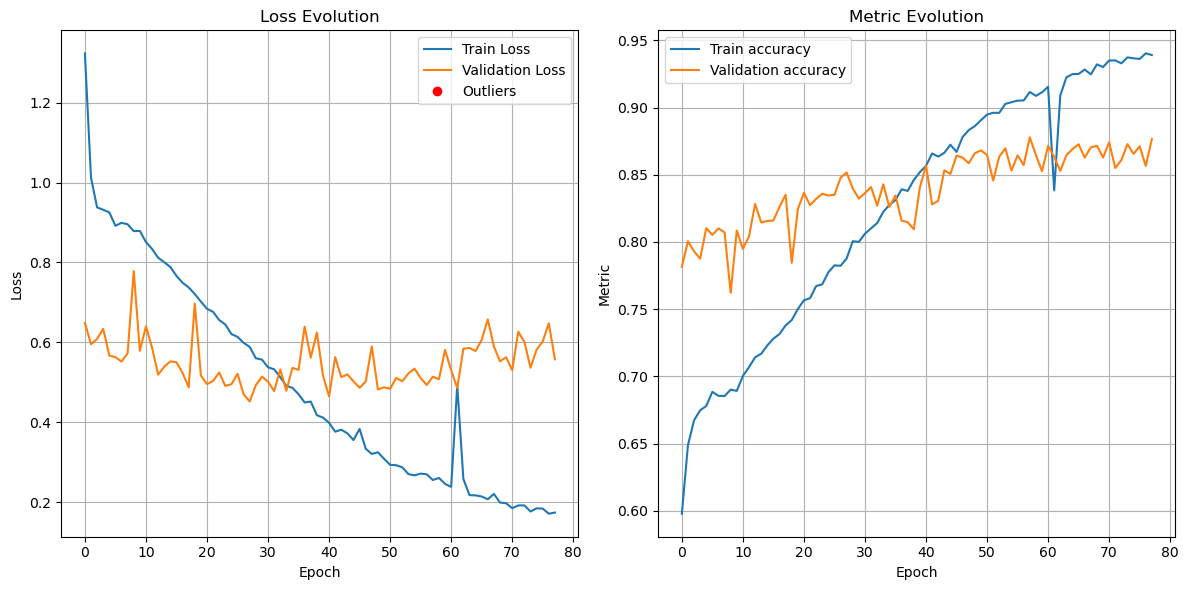

In [5]:
plot_single_output_history(history0.history)

In [ ]:
history1 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_v2s_model(HEIGHT, WIDTH, num_classes),
    os.path.join('..', '..', 'models', 'efficientnet_v2s_data_all_0_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'efficientnet_v2s_data_all_0'),
    reduction_patience=10,
    stopping_patience=20)

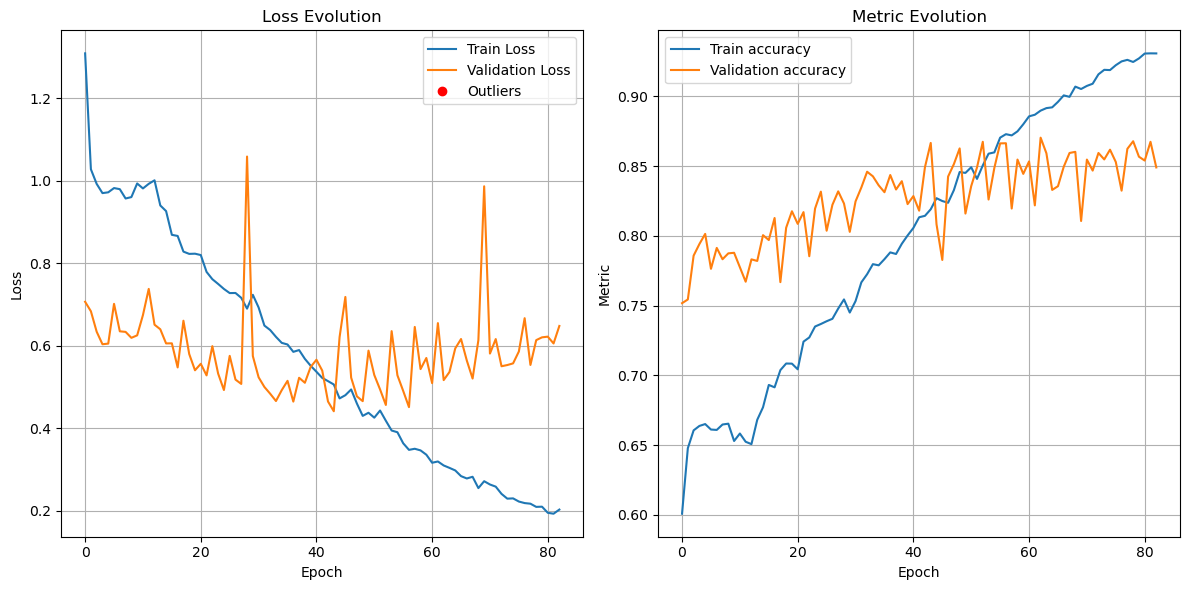

In [6]:
plot_single_output_history(history1.history)

In [ ]:
history2 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_v2b3_model(HEIGHT, WIDTH, num_classes),
    os.path.join('..', '..', 'models', 'efficientnet_v2b3_data_all_0_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'efficientnet_v2b3_data_all_0'),
    reduction_patience=10,
    stopping_patience=20)

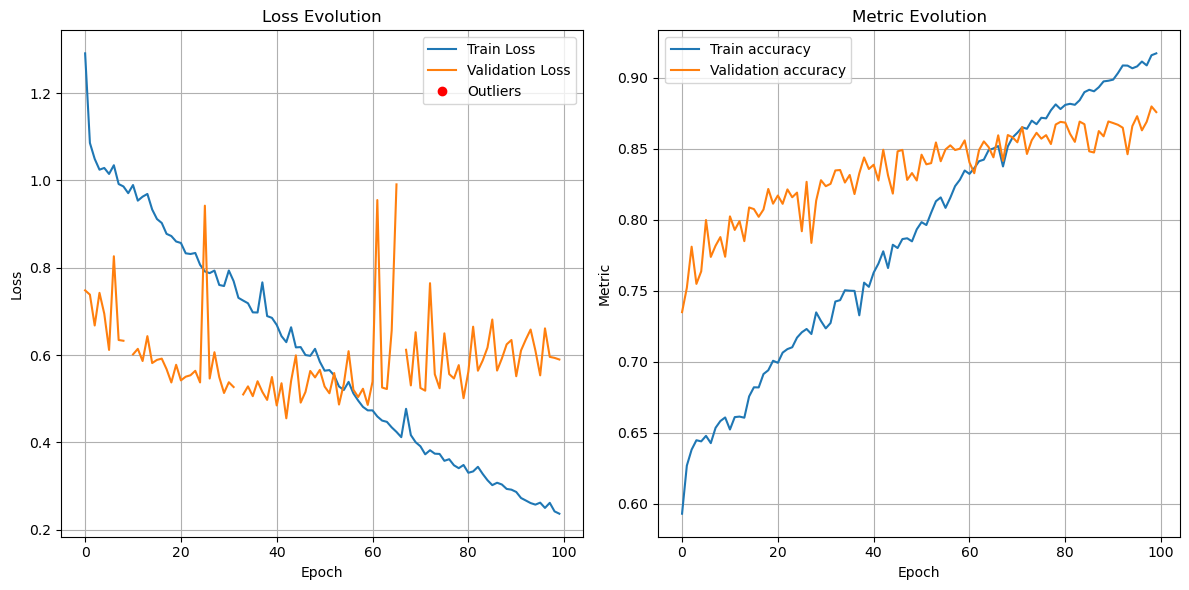

In [5]:
plot_single_output_history(history2.history)